In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("/Users/hajiaga/Downloads/titanic/train.csv")
test = pd.read_csv("/Users/hajiaga/Downloads/titanic/test.csv")
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data = pd.concat([train,test],axis = 0)
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)


In [4]:
def detect_outliers(data,col):
    Q1 = data[col].quantile(0.05)
    Q2 = data[col].quantile(0.95)
    IQR = Q2-Q1
    lower_bound = Q1-IQR*1.5
    higher_bound = Q2+IQR*1.5
    data.drop(data[data[col]>higher_bound].index ,axis =0, inplace=True)
    data.drop(data[data[col]<lower_bound].index , axis = 0, inplace=True)

In [5]:
num_cols = data.select_dtypes("number").columns

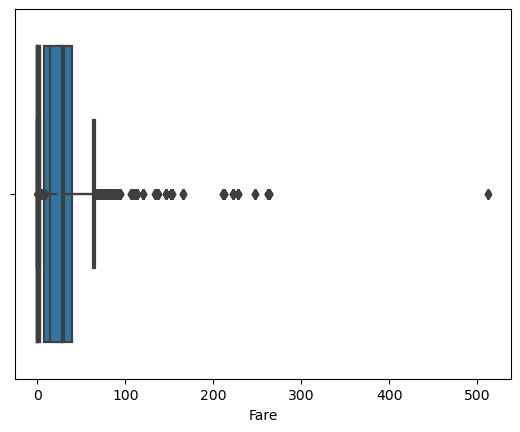

In [6]:
for i in num_cols:
    sns.boxplot(data = data, x = i)
    detect_outliers(data,i)
    sns.boxplot(data = data, x = i)
# I used this code to look at my outlier detecter's impoct on my data ,but then deleted because it will be a big output

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,male,22.0,1,0,7.2500,NaN,S
1,1.0,1,female,38.0,1,0,71.2833,C85,C
2,1.0,3,female,26.0,0,0,7.9250,NaN,S
3,1.0,1,female,35.0,1,0,53.1000,C123,S
4,0.0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
np.median(data[data["Sex"]=="male"].select_dtypes("number"))


TypeError: '<' not supported between instances of 'str' and 'float'